<a href="https://colab.research.google.com/github/Harsh-Patel25/Machine-Learning/blob/main/Internship-Projects/Hex_Software_internship(Image_Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

os.listdir('/content/drive/MyDrive')


['IMG-20230731-WA0002.jpg',
 'Untitled document (4).gdoc',
 'Eng_2ndCE_Harsh Patel(230390107014) (1).docx',
 'Eng_2ndCE_Harsh Patel(230390107014) (1).gdoc',
 'Eng_2ndCE_Harsh Patel(230390107014).docx',
 'Eng_2ndCE_Harsh Patel(230390107014).gdoc',
 'New',
 'DBMS UNIT 1 - MHP_copy.pdf',
 'DBMS - Assingment(unit-1)_copy.pdf',
 'DBMS - Assingment- Unit 2 .docx_copy.pdf',
 'Mid 1 Question Bank.gdoc',
 'W2024_Design Engineering Proposed Title and Description_copy.pdf',
 '3-CE-14-PATEL HARSH-1.docx',
 'Colab Notebooks',
 'A2-ETC-3CE-14-HARSH PATEL (1).gdoc',
 'A2-ETC-3CE-14-HARSH PATEL.gdoc',
 'ID card 15-Oct-2024.PDF',
 'Mid 2 Question Bank-DF.gdoc',
 'python',
 'JAva-Most-IMP-question_withAns(APY Material).pdf.gdrive',
 '!DOCTYPE2.gdoc',
 '!DOCTYPE2.html.gdoc',
 'DOC-20250429-WA0009.gdoc',
 'Question-Bank-MID-2-3140707.docx',
 'Question-Bank-MID-2-3140707.gdoc',
 'String_Class_Methods_Java.docx',
 'String_Class_Methods_Java.gdoc',
 'Vector_in_Java.gdoc',
 'Method_Abstraction_Refinement.gdoc

In [ ]:
os.listdir('/content/drive/MyDrive/dataset')


['Testing Dataset', 'Traning dataset']

In [ ]:
DATASET_PATH = '/content/drive/MyDrive/dataset'


In [ ]:
cat_count = len(os.listdir(DATASET_PATH + '/Traning dataset/Cat'))
dog_count = len(os.listdir(DATASET_PATH + '/Traning dataset/Dog'))

print("Cats:", cat_count)
print("Dogs:", dog_count)

Cats: 201
Dogs: 201


In [ ]:
from PIL import Image
import os

def remove_corrupted_images(folder_path):
    removed = 0
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        try:
            img = Image.open(img_path)
            img.verify()   # check image
        except:
            os.remove(img_path)
            removed += 1
    return removed


In [ ]:
# Paths for training and testing datasets
training_cat_path = os.path.join(DATASET_PATH, 'Traning dataset', 'Cat')
training_dog_path = os.path.join(DATASET_PATH, 'Traning dataset', 'Dog')
testing_cat_path = os.path.join(DATASET_PATH, 'Testing Dataset', 'Cat')
testing_dog_path = os.path.join(DATASET_PATH, 'Testing Dataset', 'Dog')

# Remove corrupted images from training set
removed_train_cats = remove_corrupted_images(training_cat_path)
removed_train_dogs = remove_corrupted_images(training_dog_path)

# Remove corrupted images from testing set
removed_test_cats = remove_corrupted_images(testing_cat_path)
removed_test_dogs = remove_corrupted_images(testing_dog_path)

print(f"Removed {removed_train_cats} corrupted cat images from training set.")
print(f"Removed {removed_train_dogs} corrupted dog images from training set.")
print(f"Removed {removed_test_cats} corrupted cat images from testing set.")
print(f"Removed {removed_test_dogs} corrupted dog images from testing set.")

Removed 0 corrupted cat images from training set.
Removed 0 corrupted dog images from training set.
Removed 0 corrupted cat images from testing set.
Removed 0 corrupted dog images from testing set.


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models


In [ ]:
train_dir = '/content/drive/MyDrive/dataset/Training dataset'
test_dir  = '/content/drive/MyDrive/dataset/Testing dataset'


In [ ]:
img_size = (224, 224)
batch_size = 32

# Correcting the directory paths based on `os.listdir` output
train_dir = '/content/drive/MyDrive/dataset/Traning dataset'
test_dir  = '/content/drive/MyDrive/dataset/Testing Dataset'

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 402 images belonging to 2 classes.
Found 402 images belonging to 2 classes.


In [ ]:
base_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False  # pretrained weights lock


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')
])


In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    train_data,
    epochs=5,
    validation_data=test_data
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.7978 - loss: 0.4971 - val_accuracy: 0.9378 - val_loss: 0.2471
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 267ms/step - accuracy: 0.9399 - loss: 0.2221 - val_accuracy: 0.9552 - val_loss: 0.1515
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 273ms/step - accuracy: 0.9659 - loss: 0.1369 - val_accuracy: 0.9652 - val_loss: 0.1130
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 291ms/step - accuracy: 0.9489 - loss: 0.1284 - val_accuracy: 0.9776 - val_loss: 0.0911
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 320ms/step - accuracy: 0.9838 - loss: 0.0955 - val_accuracy: 0.9826 - val_loss: 0.0767


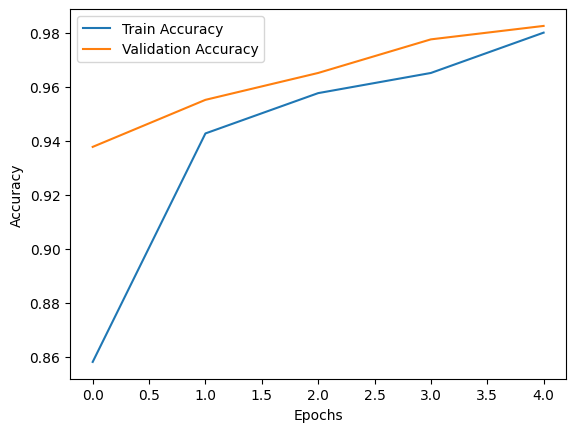

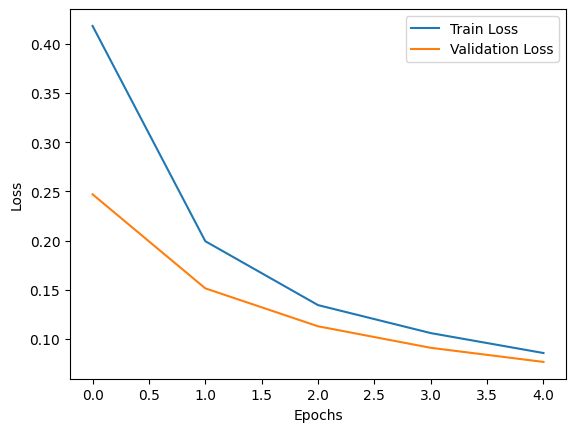

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = '/content/drive/MyDrive/dataset/Traning dataset/Cat/4.jpg'


In [ ]:
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

prediction = model.predict(img_array)

if prediction[0][0] > 0.5:
    print("Prediction: Dog 🐶")
else:
    print("Prediction: Cat 🐱")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Prediction: Cat 🐱


(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

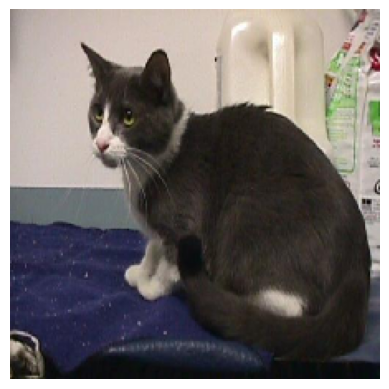

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(224,224))
plt.imshow(img)
plt.axis('off')

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input


# image
img_path = '/content/drive/MyDrive/dataset/Traning dataset/Cat/4.jpg'

img = image.load_img(img_path, target_size=(224,224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Corrected preprocessing: scale to [0, 1] to match training


# base model & layer
base_model = model.get_layer("mobilenetv2_1.00_224")
gap_layer = model.layers[-2]     # GlobalAveragePooling2D
classifier = model.layers[-1]    # Dense




# Grad-CAM
with tf.GradientTape() as tape:
    # Forward pass through backbone
    conv_outputs = base_model(img_array, training=False)
    tape.watch(conv_outputs)

    # Forward pass through classifier head
    pooled = gap_layer(conv_outputs)
    predictions = classifier(pooled)
    loss = predictions[:, 0]


print("Grad-CAM computed successfully ✅")

Grad-CAM computed successfully ✅


In [ ]:
# ===== GRAD-CAM HEATMAP GENERATION =====

with tf.GradientTape() as tape:
    conv_outputs = base_model(img_array, training=False)
    tape.watch(conv_outputs)

    pooled = gap_layer(conv_outputs)
    predictions_for_grad = classifier(pooled) # Output probability of Dog

    # Determine the target class score based on the model's prediction for this image
    # 'prediction' variable from the kernel state holds the model's overall prediction for img_array
    if prediction[0][0] > 0.5: # If predicted as Dog
        target_class_score = predictions_for_grad[0, 0]
        print("Grad-CAM for Predicted Class: Dog")
    else: # If predicted as Cat
        target_class_score = 1.0 - predictions_for_grad[0, 0]
        print("Grad-CAM for Predicted Class: Cat")

    loss = target_class_score # Compute gradients with respect to the score of the predicted class

grads = tape.gradient(loss, conv_outputs)

pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))

conv_outputs = conv_outputs[0]
heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
heatmap = tf.squeeze(heatmap)

heatmap = tf.maximum(heatmap, 0)
heatmap /= tf.reduce_max(heatmap) + 1e-8

print("Heatmap created ✅")

Grad-CAM for Predicted Class: Cat
Heatmap created ✅


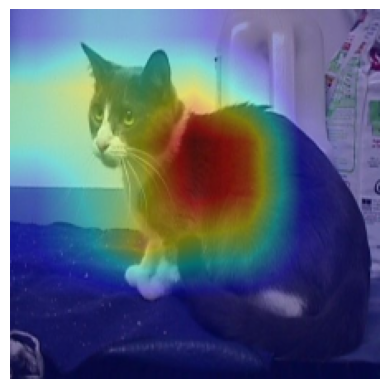

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# convert heatmap to numpy if needed
if hasattr(heatmap, "numpy"):
    heatmap_vis = heatmap.numpy()
else:
    heatmap_vis = heatmap

heatmap_vis = cv2.resize(heatmap_vis, (224,224))
heatmap_vis = np.uint8(255 * heatmap_vis)
heatmap_color = cv2.applyColorMap(heatmap_vis, cv2.COLORMAP_JET)

original = cv2.imread(img_path)
original = cv2.resize(original, (224,224))

overlay = cv2.addWeighted(original, 0.6, heatmap_color, 0.4, 0)

plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,261,829 (8.63 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 2,564 (10.02 KB)

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

def run_complete_image_analysis(model, img_path, img_size=(224,224)):
    # -------- Load & preprocess image --------
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # -------- Extract base model & layers --------
    base_model = model.get_layer("mobilenetv2_1.00_224")
    gap_layer = model.layers[-2]   # GlobalAveragePooling2D
    classifier = model.layers[-1]  # Dense

    # -------- Forward pass WITH GradientTape --------
    with tf.GradientTape() as tape:
        conv_outputs = base_model(img_array, training=False)
        tape.watch(conv_outputs)

        pooled = gap_layer(conv_outputs)
        preds = classifier(pooled)
        loss = preds[:, 0]

    # -------- Gradients --------
    grads = tape.gradient(loss, conv_outputs)
    if grads is None:
        raise RuntimeError("Gradients are None — check model structure")

    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))

    # -------- Grad-CAM heatmap --------
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0)
    heatmap /= tf.reduce_max(heatmap) + 1e-8
    heatmap = heatmap.numpy()

    # -------- Heatmap processing --------
    heatmap_resized = cv2.resize(heatmap, img_size)

    # Heap map (grayscale)
    heap_map = np.uint8(255 * heatmap_resized)
    heap_map_3ch = cv2.cvtColor(heap_map, cv2.COLOR_GRAY2BGR)

    # Heat map (colored)
    heat_map_color = cv2.applyColorMap(heap_map, cv2.COLORMAP_JET)

    # Original image
    original = cv2.imread(img_path)
    original = cv2.resize(original, img_size)

    # Overlays
    overlay_gray = cv2.addWeighted(original, 0.6, heap_map_3ch, 0.4, 0)
    overlay_color = cv2.addWeighted(original, 0.6, heat_map_color, 0.4, 0)

    # -------- Prediction + Confidence --------
    prob = preds[0][0].numpy()
    if prob > 0.5:
        label = "Dog"
        confidence = prob * 100
    else:
        label = "Cat"
        confidence = (1 - prob) * 100

    # -------- Visualization --------
    plt.figure(figsize=(16,8))

    plt.subplot(2,3,1)
    plt.imshow(img)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(2,3,2)
    plt.imshow(heap_map, cmap="gray")
    plt.title("Heap Map (Grayscale Attention)")
    plt.axis("off")

    plt.subplot(2,3,3)
    plt.imshow(cv2.cvtColor(heat_map_color, cv2.COLOR_BGR2RGB))
    plt.title("Heat Map (Colored Grad-CAM)")
    plt.axis("off")

    plt.subplot(2,3,5)
    plt.imshow(cv2.cvtColor(overlay_gray, cv2.COLOR_BGR2RGB))
    plt.title("Image + Heap Map Overlay")
    plt.axis("off")

    plt.subplot(2,3,6)
    plt.imshow(cv2.cvtColor(overlay_color, cv2.COLOR_BGR2RGB))
    plt.title("Image + Heat Map Overlay")
    plt.axis("off")

    plt.suptitle(
        f"Prediction: {label} | Confidence: {confidence:.2f}%",
        fontsize=14,
        fontweight="bold"
    )

    plt.tight_layout()
    plt.show()


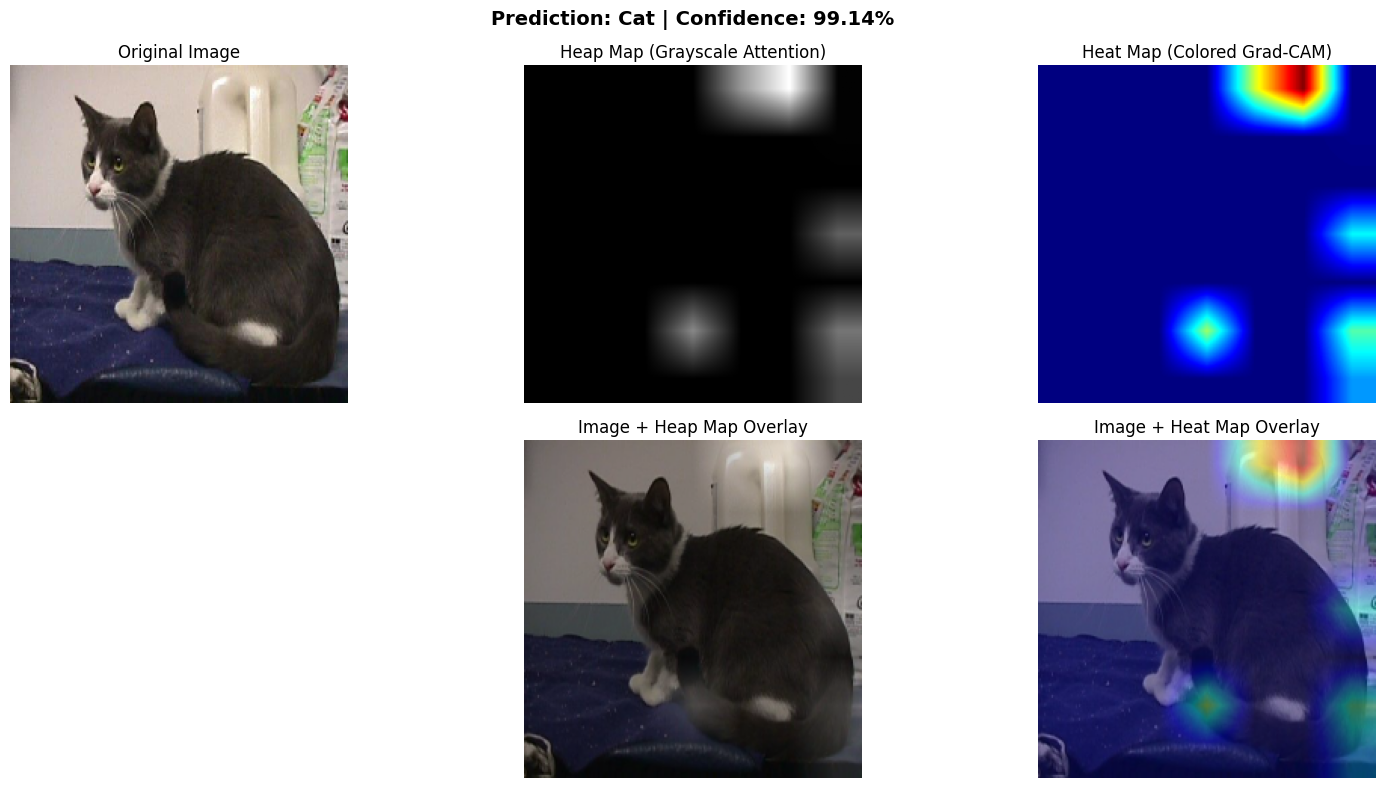

In [ ]:
run_complete_image_analysis(model,'/content/drive/MyDrive/dataset/Traning dataset/Cat/4.jpg')